In [28]:
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

#funzioni
#Pt 1
def Lambda(x,Z,F,m): # nm
    L = x*F/(Z*m) *M  # M: normalizzazione L[nm]
    return L

#errore
def SigmaLambda(x,sx,Z,sZ,F,sF):
    dx = Lambda(sx,Z, F,m)
    dF = Lambda( x,Z,sF,m)
    dZ = F*x/(np.power(Z,2)*m)*sZ *M
    sL = np.sqrt(np.power(dx,2) + np.power(dZ,2) + np.power(dF,2) )
    return sL

In [29]:
df1   = pd.read_csv('data1.csv')
m     = np.asarray(df1.iloc[:,0]) # m del minimo
F     = np.asarray(df1.iloc[:,1]) #fenditura

sF    = np.full(7,0.001) # sigma a caso
# sigma a caso
df1

,m,d[mm],I0[mV],I1[mV],I2[mV],I3[mV],I4[mV],x0[mm],x1[mm],x2[mm],x3[mm],x4[mm]
0,1.00,0.2,6400,55,47,55,57,10.90,8.39,8.34,7.13,7.00
1,1.00,0.2,6400,31,27,24,28,10.90,13.67,13.84,14.40,14.42
2,1.00,0.4,7280,70,68,72,78,8.28,6.98,7.00,7.07,7.09
3,1.00,0.4,7280,165,154,152,158,8.28,10.41,10.44,10.53,10.54
4,1.22,0.6,8020,71,68,76,82,10.84,9.09,9.01,9.00,8.98
5,1.22,0.4,8850,46,44,42,45,8.74,7.09,7.06,6.99,6.97
6,1.22,0.4,8850,122,121,124,128,8.74,10.16,10.15,10.10,10.07


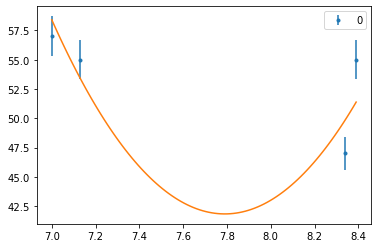

a =  26.544319189827 +- 42.197349513262836
b =  -413.5711639235119 +- 650.7287235289989
COV =  -27458.50842423222
[[ 1.78061631e+03 -2.74585084e+04  1.05107942e+05]
 [-2.74585084e+04  4.23447872e+05 -1.62097193e+06]
 [ 1.05107942e+05 -1.62097193e+06  6.20538883e+06]]


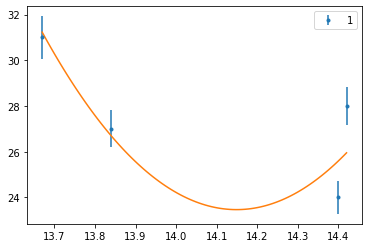

a =  33.84698917665372 +- 37.12113813568784
b =  -957.8034570731096 +- 1044.7802331922014
COV =  -38783.12020817429
[[ 1.37797890e+03 -3.87831202e+04  2.72738946e+05]
 [-3.87831202e+04  1.09156574e+06 -7.67646602e+06]
 [ 2.72738946e+05 -7.67646602e+06  5.39858405e+07]]


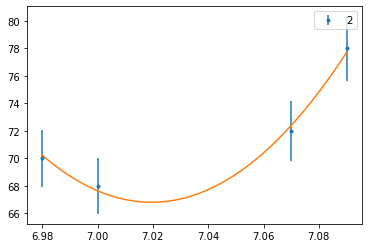

a =  2194.2954117289596 +- 364.89929639478476
b =  -30805.87170472203 +- 5133.828273832293
COV =  -1873328.4755602134
[[ 1.33151497e+05 -1.87332848e+06  6.58875901e+06]
 [-1.87332848e+06  2.63561927e+07 -9.26986095e+07]
 [ 6.58875901e+06 -9.26986095e+07  3.26035298e+08]]


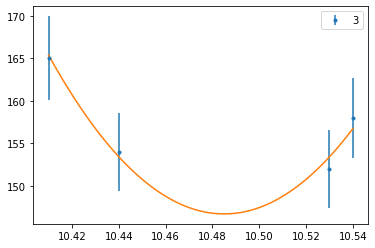

a =  3322.678280398481 +- 859.8842050151433
b =  -69676.65739657456 +- 18019.415498933515
COV =  -15494602.640770683
[[ 7.39400846e+05 -1.54946026e+07  8.11724605e+07]
 [-1.54946026e+07  3.24699335e+08 -1.70102275e+09]
 [ 8.11724605e+07 -1.70102275e+09  8.91126384e+09]]


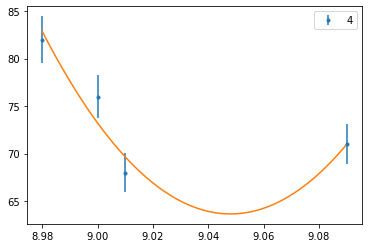

a =  4150.8981421683175 +- 1682.7784547442996
b =  -75115.20080285847 +- 30426.064439746053
COV =  -51200282.21804577
[[ 2.83174333e+06 -5.12002822e+07  2.31430140e+08]
 [-5.12002822e+07  9.25745397e+08 -4.18446424e+09]
 [ 2.31430140e+08 -4.18446424e+09  1.89142398e+10]]


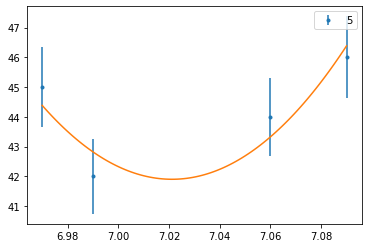

a =  946.870179082335 +- 548.9284385030958
b =  -13296.334217111598 +- 7717.157762470969
COV =  -4236160.896964393
[[ 3.01322431e+05 -4.23616090e+06  1.48878741e+07]
 [-4.23616090e+06  5.95545239e+07 -2.09303418e+08]
 [ 1.48878741e+07 -2.09303418e+08  7.35595742e+08]]


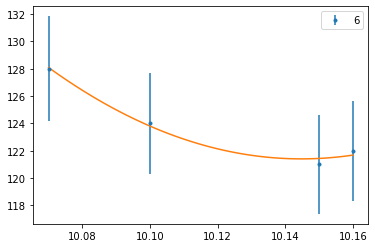

a =  1195.8317618342264 +- 405.51916556692896
b =  -24262.944089588338 +- 8204.76626096025
COV =  -3327188.336383236
[[ 1.64445794e+05 -3.32718834e+06  1.68293084e+07]
 [-3.32718834e+06  6.73181894e+07 -3.40503623e+08]
 [ 1.68293084e+07 -3.40503623e+08  1.72231060e+09]]


In [38]:
ArrX = np.asarray(df1.iloc[:,8:12])
ArrY = np.asarray(df1.iloc[:,3:7])
ArrsX = ArrX*0.005
ArrsY = ArrY*0.03

Xmin = np.asarray([])
sXmin = np.asarray([])

def Parabola(x,a,b,c):
    return a*x**2 + b*x +c
def SigmaVertice(a,b,sa,sb,COV):
    da = -b/(2*a**2) *sa
    db = -1/(2*a) *sb
    CORR = 1/(2*a**2) *COV
    return np.sqrt(np.power(da,2) + np.power(db,2) + 2*CORR )

for f in range(len(ArrX)):

    X  = ArrX[f]
    sX = ArrsX[f]
    Y  = ArrY[f]
    sY = ArrsY[f]
    
    x = np.linspace(np.min(X),np.max(X),100)
    [a,b,c],pcov = s.optimize.curve_fit(Parabola,X,Y,sigma = sY,absolute_sigma = False)
    [sa,sb,sc] = np.sqrt(np.diag(pcov))
    plt.errorbar(X,Y,sY, ls='', marker='.',label = '{}'.format(f))
    plt.plot(x,Parabola(x,a,b,c))
    plt.legend()
    plt.show()

    Value = -b/(2*a)
    sValue = SigmaVertice(a,b,sa,sb,1)
    #print('Xmin = ',Value)
    print('a = ',a,'+-',sa)
    print('b = ',b,'+-',sb)
    print('COV = ',pcov[0][1])
    print(pcov)
    Xmin = np.append(Xmin,Value)                         
    sXmin = np.append(sXmin,sValue)

Xmin =  np.abs(Xmin  - df1.iloc[:,7])

#Xmin[2] = Xmin[2]+0.5
Xmin[0] = Xmin[0]-0.5
Xmin[3] = Xmin[3]-0.5
Xmin[4] = Xmin[4]-0.5

In [36]:
for u in range(len(Xmin)):
    print(Xmin[u],'+-',sXmin[u])
pcov[0][1]

2.609799193493849 +- 17.42439134670069
3.2490199681428056 +- 21.8856795100986
1.2604637356712356 +- 1.6522004214032788
1.7050148278323185 +- 3.839149706987796
1.2919350621158223 +- 5.184668026044223
1.7187983510252343 +- 5.7589668974408745
1.404798053169424 +- 4.864653911424123


-3335852.664474443

In [39]:
Z = 852     # mm 
sZ  = 2
sXmin = np.asarray([0.4,0.4,0.06,0.08,0.08,0.06,0.06])

Array_L  = Lambda(Xmin,Z,F,m)
Array_sL = SigmaLambda(Xmin,sXmin,Z,sZ,F,sF)
L = np.sum(Array_L)/len(Array_L)
sL = my.sqrt_sum(Array_sL)/len(Array_sL)
#sL = 1
print(Array_L)
print('Lambda =',L,' +- ',sL)

0    612.628873
1    762.680763
2    591.767090
3    800.476114
4    745.748088
5    661.432182
6    540.598136
Name:  x0[mm], dtype: float64
Lambda = 673.6187495593161  +-  21.70774694390639
